In [8]:
import pandas as pd

In [9]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [10]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [12]:
# Data Clearning

In [13]:
cols_to_norm =['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [14]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [15]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [16]:
import tensorflow as tf

In [17]:
diebetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [19]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [20]:
assigned_group  = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [21]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

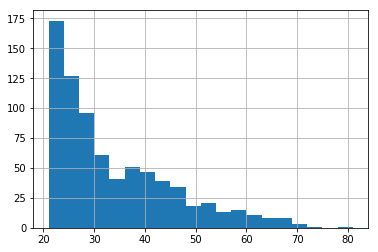

In [26]:
diabetes['Age'].hist(bins=20)

In [27]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [28]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [29]:
# Train Test Split

In [30]:
x_data = diabetes.drop('Class',axis=1)

In [31]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [32]:
labels = diabetes['Class']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=101)

In [35]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [36]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_session_config': None, '_model_dir': '/tmp/tmpuz7ojacj', '_save_checkpoints_secs': 600}


In [37]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpuz7ojacj/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 634.988
INFO:tensorflow:loss = 6.62324, step = 101 (0.162 sec)
INFO:tensorflow:global_step/sec: 652.232
INFO:tensorflow:loss = 4.11246, step = 201 (0.151 sec)
INFO:tensorflow:global_step/sec: 653.28
INFO:tensorflow:loss = 4.33195, step = 301 (0.154 sec)
INFO:tensorflow:global_step/sec: 656.914
INFO:tensorflow:loss = 6.26207, step = 401 (0.153 sec)
INFO:tensorflow:global_step/sec: 687.07
INFO:tensorflow:loss = 4.2509, step = 501 (0.144 sec)
INFO:tensorflow:global_step/sec: 669.202
INFO:tensorflow:loss = 5.02075, step = 601 (0.152 sec)
INFO:tensorflow:global_step/sec: 643.088
INFO:tensorflow:loss = 3.65999, step = 701 (0.155 sec)
INFO:tensorflow:global_step/sec: 657.031
INFO:tensorflow:loss = 5.97445, step = 801 (0.151 sec)
INFO:tensorflow:global_step/sec: 646.048
INFO:tensorflow:loss = 5.10188, st

In [38]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [39]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-31-12:32:59
INFO:tensorflow:Restoring parameters from /tmp/tmpuz7ojacj/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-31-12:32:59
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.724409, accuracy_baseline = 0.65748, auc = 0.790935, auc_precision_recall = 0.634818, average_loss = 0.528811, global_step = 1000, label/mean = 0.34252, loss = 5.16607, prediction/mean = 0.381068


In [40]:
results

{'accuracy': 0.72440946,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7909354,
 'auc_precision_recall': 0.6348182,
 'average_loss': 0.5288105,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.1660719,
 'prediction/mean': 0.38106766}

In [41]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [42]:
predictions = model.predict(pred_input_func)

In [43]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmpuz7ojacj/model.ckpt-1000


In [44]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.5698086], dtype=float32),
  'logits': array([ 0.28107011], dtype=float32),
  'probabilities': array([ 0.43019146,  0.5698086 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.65822089], dtype=float32),
  'logits': array([ 0.65537596], dtype=float32),
  'probabilities': array([ 0.34177911,  0.65822089], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.42345467], dtype=float32),
  'logits': array([-0.30860752], dtype=float32),
  'probabilities': array([ 0.57654536,  0.42345464], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.32746965], dtype=float32),
  'logits': array([-0.71965188], dtype=float32),
  'probabilities': array([ 0.67253035,  0.32746965], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

In [53]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_session_config': None, '_model_dir': '/tmp/tmpi5qer9n8', '_save_checkpoints_secs': 600}


In [54]:
embeded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [55]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embeded_group_col,age_bucket]

In [56]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [57]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_session_config': None, '_model_dir': '/tmp/tmp9d3ulvow', '_save_checkpoints_secs': 600}


In [58]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp9d3ulvow/model.ckpt.
INFO:tensorflow:loss = 7.0063, step = 1
INFO:tensorflow:global_step/sec: 637.879
INFO:tensorflow:loss = 6.23051, step = 101 (0.162 sec)
INFO:tensorflow:global_step/sec: 632.396
INFO:tensorflow:loss = 8.23528, step = 201 (0.159 sec)
INFO:tensorflow:global_step/sec: 672.596
INFO:tensorflow:loss = 3.82135, step = 301 (0.149 sec)
INFO:tensorflow:global_step/sec: 645.962
INFO:tensorflow:loss = 7.12344, step = 401 (0.153 sec)
INFO:tensorflow:global_step/sec: 600.39
INFO:tensorflow:loss = 6.78587, step = 501 (0.164 sec)
INFO:tensorflow:global_step/sec: 671.26
INFO:tensorflow:loss = 6.04867, step = 601 (0.150 sec)
INFO:tensorflow:global_step/sec: 638.417
INFO:tensorflow:loss = 2.19843, step = 701 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.702
INFO:tensorflow:loss = 4.34202, step = 801 (0.158 sec)
INFO:tensorflow:global_step/sec: 651.283
INFO:tensorflow:loss = 2.93939, st

In [59]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [60]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-31-12:42:33
INFO:tensorflow:Restoring parameters from /tmp/tmp9d3ulvow/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-31-12:42:34
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.740157, accuracy_baseline = 0.65748, auc = 0.830821, auc_precision_recall = 0.707932, average_loss = 0.480728, global_step = 1000, label/mean = 0.34252, loss = 4.69634, prediction/mean = 0.347561


{'accuracy': 0.74015749,
 'accuracy_baseline': 0.65748036,
 'auc': 0.83082116,
 'auc_precision_recall': 0.70793164,
 'average_loss': 0.48072812,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.6963439,
 'prediction/mean': 0.34756055}